### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

La Función de Transferencia Gp es:
<TransferFunction>: sys[216]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[218]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Las raíces de s (polos) son:
[-3.+1.j -3.-1.j]


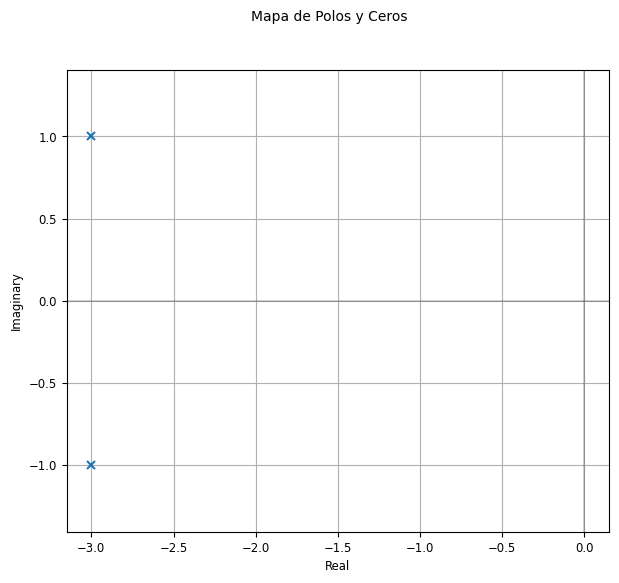

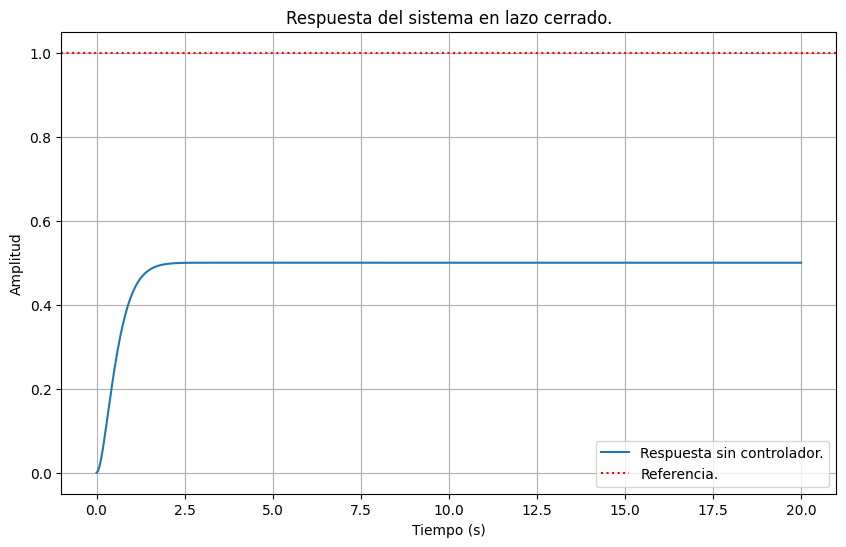

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 				0.00%
  - Tiempo de establecimiento (SettlingTime): 		1.67 s
  - Valor final: 					0.5000
  - Error en estado estacionario (1 - valor_final):	 0.5000


In [40]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num = [5]
den = [1, 6, 5]

# --- Creación del objeto Función de Transferencia. ---
# Usamos la función tf de la biblioteca control.
Gp = ct.tf(num, den)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia Gp es:")
print(Gp)
# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("\nFunción de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Indicar las raíces de s (Polos del sistema). ---
polos = ct.poles(sistema_base)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): \t\t\t\t{info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): \t\t{info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: \t\t\t\t\t{valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final):\t {1 - valor_final:.4f}")

#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Integral-Derivativo:
<TransferFunction>: sys[256]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 60 s + 50
  ------------------------
  s^3 + 21 s^2 + 65 s + 50


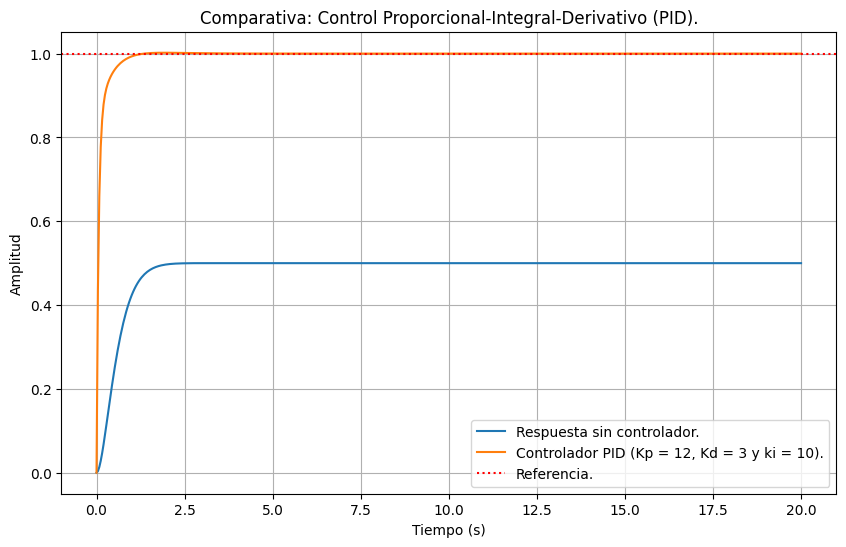

Métricas de desempeño del sistema con controlador PID:
  - Sobreimpulso (Overshoot): 0.21%
  - Tiempo de establecimiento (SettlingTime): 0.72 s
  - Valor final: 1.0000
  - Error en estado estacionario (1 - valor_final): -0.0000


In [46]:
# --- Parámetros del controlador Proporcional-Integral-Derivativo. ---
Kp_pid = 12
Kd_pid = 3
ki_pid = 10

# --- Creación del controlador PID. ---
# El numerador es [Kd, Kp, ki] y el denominador [1, 0]
Gc_PID = ct.tf([Kd_pid, Kp_pid, ki_pid], [1, 0])

# --- Sistema en lazo cerrado con controlador PID. ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema de lazon cerrado con controlador Proporcional-Integral-Derivativo:")
print(sistema_PID)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {Kp_pid}, Kd = {Kd_pid} y ki = {ki_pid}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema con controlador PID:")
info = ct.step_info(sistema_PID)
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")

* **Justificación**


Tras varios ejercicios donde se analizó y se comprendieron las funció
ones de cada ganancia, se intuyo que la ganancia kd reducía el tiempo de manera proporcional a la que decrementaba su valor, mientras que kp y ki debían mantenerse cercanos para poder mantener un error igual a 0. Por todo lo anterior basto con ir sintonizando los valores necesarios hasta hallar los adecuados que cumplieran con el comportamiento deseado.

---

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

La Función de Transferencia Gc es:
<TransferFunction>: sys[272]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  3 s^2 + 12 s + 10
  -----------------
          1
La Función de Transferencia Gp es:
<TransferFunction>: sys[216]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  -------------
  s^2 + 6 s + 5

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[275]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  15 s^2 + 60 s + 50
  ------------------
  16 s^2 + 66 s + 55
Las raíces de s (polos) son:
[-2.96605202+0.j -1.15894798+0.j]


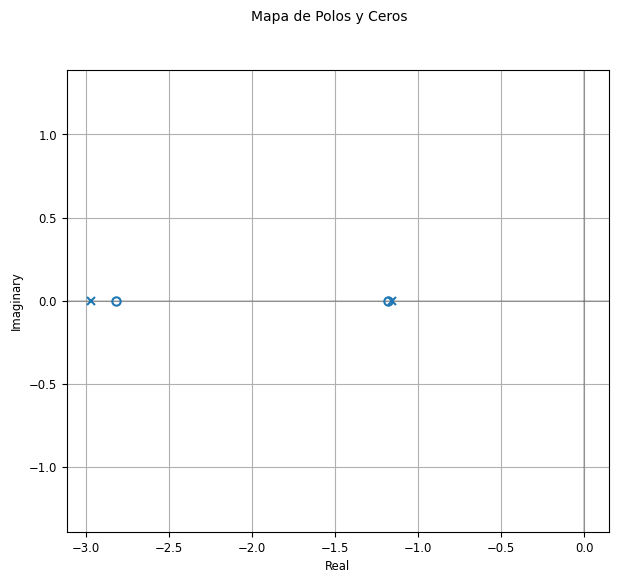

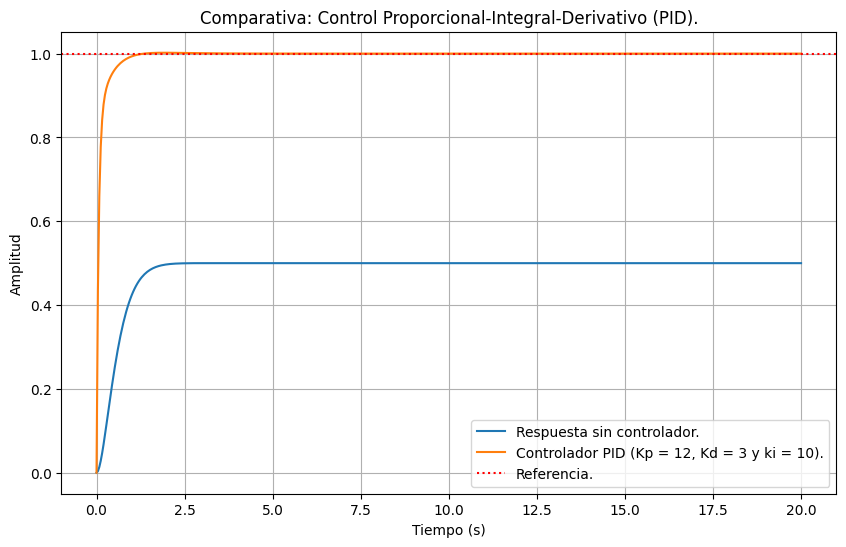

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 				0.21%
  - Tiempo de establecimiento (SettlingTime): 		0.72 s
  - Valor final: 					1.0000
  - Error en estado estacionario (1 - valor_final):	 -0.0000


In [ ]:
# --- Coeficientes de la Función de Transferencia G(s). ---
# G(s) = num / den
num1 = [3, 12, 10]
den1 = [1]

# Usamos la función tf de la biblioteca control.
Gc = ct.tf(num1, den1)

# Imprimir la función de transferencia para verificarla.
print("La Función de Transferencia Gc es:")
print(Gc)
print("La Función de Transferencia Gp es:")
print(Gp)
# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base1 = ct.feedback(Gp*Gc, 1)
print("\nFunción de Transferencia del sistema base (lazo cerrado):")
print(sistema_base1)

# --- Indicar las raíces de s (Polos del sistema). ---
polos1 = ct.poles(sistema_base1)

# Imprimimos el resultado.
print("Las raíces de s (polos) son:")
print(polos1)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base1, title='Mapa de Polos y Ceros')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.plot(t, y_PID, label=f"Controlador PID (Kp = {Kp_pid}, Kd = {Kd_pid} y ki = {ki_pid}).")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Comparativa: Control Proporcional-Integral-Derivativo (PID).")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_PID)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): \t\t\t\t{info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): \t\t{info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_PID[-1]
print(f"  - Valor final: \t\t\t\t\t{valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final):\t {1 - valor_final:.4f}")

#### Entrega:

Comparta el enlace de su notebook en su repositorio de GitHub, asegurándose de que los resultados de la ejecución de las celdas (gráficas, impresiones) sean visibles.